![Plane departing the Pacific Northwest](IMG_8801.JPG)

A prominent airline company in the Pacific Northwest has accumulated extensive data related to flights and weather patterns and needs to understand the factors influencing the departure delays and cancellations to benefit both airlines and passengers. As the data analyst on the team, you decide to embark on this analytical project.

The aviation industry is dynamic with various variables impacting flight operations. To ensure the relevance and applicability of your findings, you choose to focus solely on flights from the 'pnwflights2022' datasets available from the ModernDive team exported as CSV files. These datasets provide comprehensive information on flights departing in the first half of 2022 from both of the two major airports in this region: SEA (Seattle-Tacoma International Airport) and PDX (Portland International Airport): 

- `flights2022.csv` contains information about about each flight including 

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `dep_time`   | Departure time (in the format hhmm) where`NA` corresponds to a cancelled flight        |
| `dep_delay`  | Departure delay, in minutes (negative for early)    |
| `origin`     | Origin airport where flight starts (IATA code)
| `airline`    | Carrier/airline name                        |
| `dest`       | Destination airport where flight lands (IATA code)  

- `flights_weather2022.csv` contains the same flight information as well as weather conditions such as 
 
| Variable   | Description                                           |
|------------|-------------------------------------------------------|
| `visib`      | Visibility (in miles)                                 |
| `wind_gust`  | Wind gust speed (in mph)  

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the data
flights2022 = pd.read_csv("flights2022.csv")
flights_weather2022 = pd.read_csv("flights_weather2022.csv")

In [3]:
# Create route column
flights2022["route"] = flights2022["origin"] + "-" + flights2022["dest"]

In [4]:
# Calculate mean departure delay and number of canceled flights for each unique flight route
routes_delays_cancels = flights2022.groupby("route").agg(
    mean_dep_delay=("dep_delay", "mean"),
    total_cancellations=("dep_time", lambda x: x.isna().sum())
).reset_index()

In [5]:
# Identify routes with the highest mean departure delays
top_routes_by_delay = routes_delays_cancels.sort_values("mean_dep_delay", ascending=False).head(9)

In [6]:
# Identify routes with the highest number of cancellations
top_routes_by_cancellations = routes_delays_cancels.sort_values("total_cancellations", ascending=False).head(9)

/var/folders/rk/vsbmyjqx09n87m8t22syxyvr0000gn/T/ipykernel_40353/1658541679.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_routes_by_cancellations["route"], rotation=90)


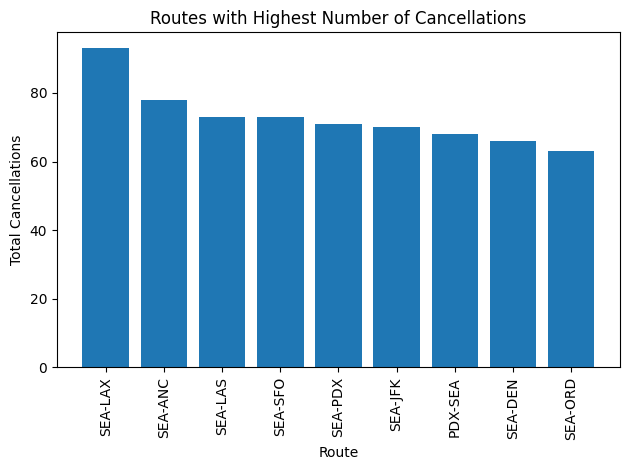

In [12]:
# Create a bar graph for highest number of cancellations
top9_route_cancels_bar, ax = plt.subplots()
ax.bar(top_routes_by_cancellations["route"], top_routes_by_cancellations["total_cancellations"])
ax.set_xlabel("Route")
ax.set_ylabel("Total Cancellations")
ax.set_title("Routes with Highest Number of Cancellations")
ax.set_xticklabels(top_routes_by_cancellations["route"], rotation=90)
plt.tight_layout()
plt.show()
plt.close()

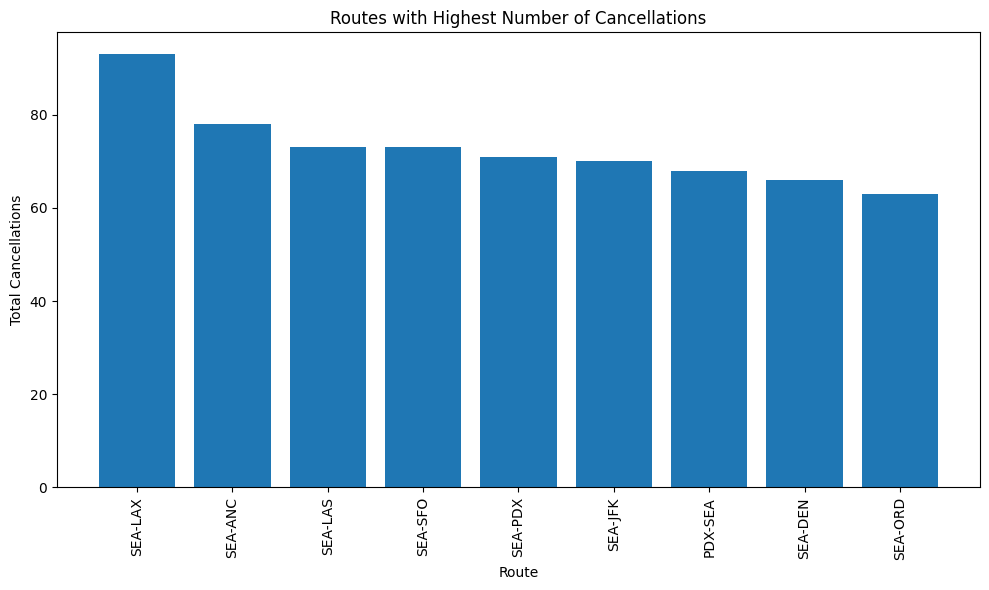

In [10]:
# Assuming you're plotting a bar chart or similar with top_routes_by_cancellations data
import matplotlib.pyplot as plt
import numpy as np

# Create your plot
fig, ax = plt.subplots(figsize=(10, 6))

# Example of a bar plot (adjust to match your actual plot type)
bars = ax.bar(range(len(top_routes_by_cancellations)), 
             top_routes_by_cancellations["total_cancellations"])  # Assuming this is your y-value column

ax.set_xlabel("Route")
ax.set_ylabel("Total Cancellations")
ax.set_title("Routes with Highest Number of Cancellations")
# First set the tick positions
ax.set_xticks(range(len(top_routes_by_cancellations)))

# Then set the tick labels
ax.set_xticklabels(top_routes_by_cancellations["route"], rotation=90)

plt.tight_layout()
plt.show()

In [13]:
# Find mean departure delays and total cancellations by airline
airlines_delays_cancels = flights2022.groupby("airline").agg(
    mean_dep_delay=("dep_delay", "mean"),
    total_cancellations=("dep_time", lambda x: x.isna().sum())
).reset_index()

In [14]:
# Identify airlines with the highest mean departure delay
top_airlines_by_delay = airlines_delays_cancels.sort_values("mean_dep_delay", ascending=False).head(9)

In [15]:
# Identify airlines with the highest number of cancellations
top_airlines_by_cancellations = airlines_delays_cancels.sort_values("total_cancellations", ascending=False).head(9)

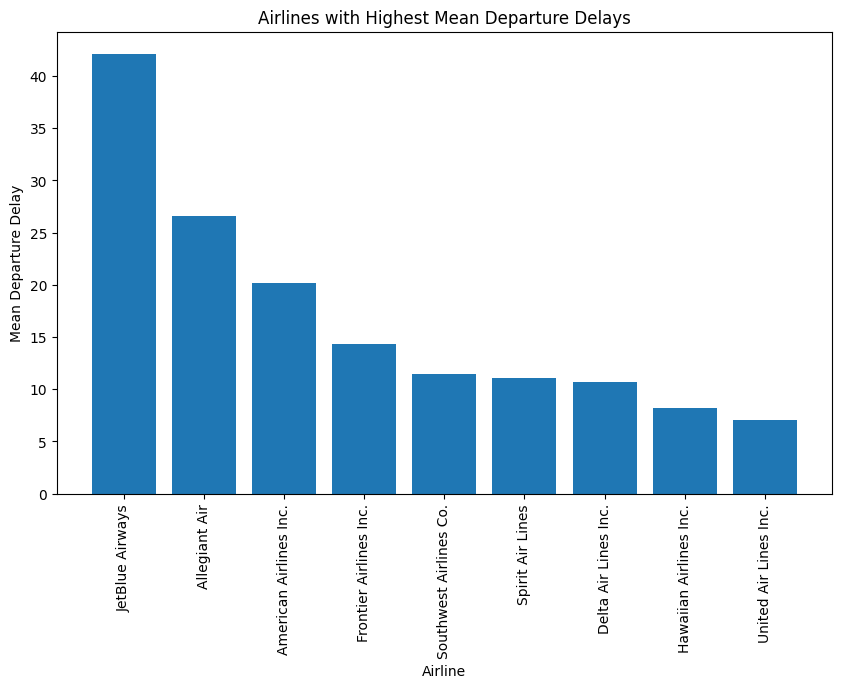

In [19]:
# Create a bar graph for highest mean depearture delay
top9_airline_delays_bar, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(range(len(top_airlines_by_delay['airline'])), 
             top_airlines_by_delay["mean_dep_delay"])  # Assuming this is your y-value column

# ax.bar(top_airlines_by_delay["airline"], top_airlines_by_delay["mean_dep_delay"])
ax.set_xlabel("Airline")
ax.set_ylabel("Mean Departure Delay")
ax.set_title("Airlines with Highest Mean Departure Delays")
ax.set_xticks(range(len(top_airlines_by_delay)))
ax.set_xticklabels(top_airlines_by_delay["airline"], rotation=90)
plt.show()

In [20]:
# Are departure delays impacted by 10+ mph winds from each airport
flights_weather2022["group"] = flights_weather2022["wind_gust"].apply(lambda x: ">= 10mph" if x >= 10 else "< 10 mph")
wind_grouped_data = flights_weather2022.groupby(["group", "origin"]).agg(
    mean_dep_delay=("dep_delay", "mean")
)

In [21]:
flights_weather2022

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,group
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,...,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,< 10 mph
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,...,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0,>= 10mph
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,...,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,< 10 mph
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,...,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,< 10 mph
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,...,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0,< 10 mph
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111001,2022,6,30,NaN,1155,NaN,NaN,2033,NaN,UA,...,56.0,51.0,83.88,30.0,9.20624,10.594357,0.0,1021.5,10.0,>= 10mph
111002,2022,6,30,NaN,1448,NaN,NaN,1732,NaN,DL,...,60.0,53.0,77.65,20.0,6.90468,7.945768,0.0,1021.9,10.0,< 10 mph
111003,2022,6,30,NaN,1751,NaN,NaN,2352,NaN,DL,...,65.0,53.0,65.56,280.0,6.90468,7.945768,0.0,1021.3,10.0,< 10 mph
111004,2022,6,30,NaN,1145,NaN,NaN,2029,NaN,DL,...,56.0,51.0,83.88,30.0,9.20624,10.594357,0.0,1021.5,10.0,>= 10mph


In [22]:
display(wind_grouped_data)

mean_dep_delay
group    origin                
< 10 mph PDX           6.686966
         SEA           7.857595
>= 10mph PDX           9.147024
         SEA           9.231060

In [23]:
wind_response = True